In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
df.shape

(140700, 20)

In [4]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [5]:
student_df = df[df['Working Professional or Student']=='Student']
professional_df = df[df['Working Professional or Student']=='Working Professional']

In [6]:
valid_city = df['City'].value_counts() > 7
valid_city = valid_city[valid_city==True].index
df = df[df['City'].isin(valid_city)]

<Axes: xlabel='Depression', ylabel='count'>

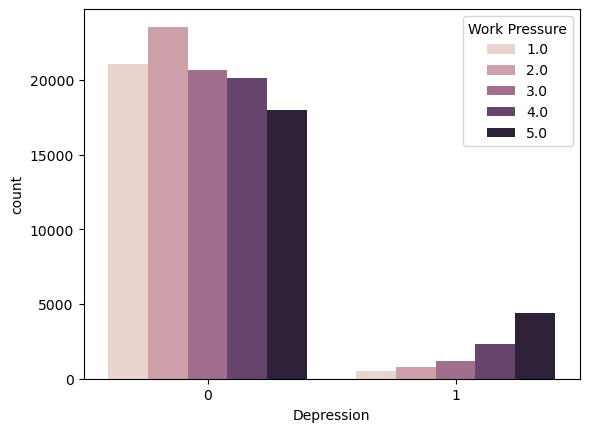

In [7]:
sns.countplot(x='Depression',hue='Work Pressure', data=df)

In [8]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36602
Academic Pressure                        112731
Work Pressure                             27892
CGPA                                     112730
Study Satisfaction                       112731
Job Satisfaction                          27884
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [9]:
df.drop(columns=['id','Name','City','Academic Pressure', 'Profession','CGPA', 'Study Satisfaction'], inplace= True)

In [10]:
df = df[df['Dietary Habits'].isin(['Healthy','Unhealthy','Moderate'])]

In [11]:
df = df[df['Sleep Duration'].isin(['Less than 5 hours', '5-6 hours', '6-7 hours', '7-8 hours', 'More than 8 hours'])]

In [12]:
valid_deg = df['Degree'].value_counts() > 4
valid_deg = valid_deg[valid_deg==True].index
df = df[df['Degree'].isin(valid_deg)]

In [13]:
df['Work Pressure'] = df['Work Pressure'].fillna(df['Work Pressure'].median(skipna=True))

In [14]:
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(df['Job Satisfaction'].median(skipna=True))

In [15]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median(skipna=True))

In [16]:
df.shape

(140394, 13)

<Axes: xlabel='Depression', ylabel='count'>

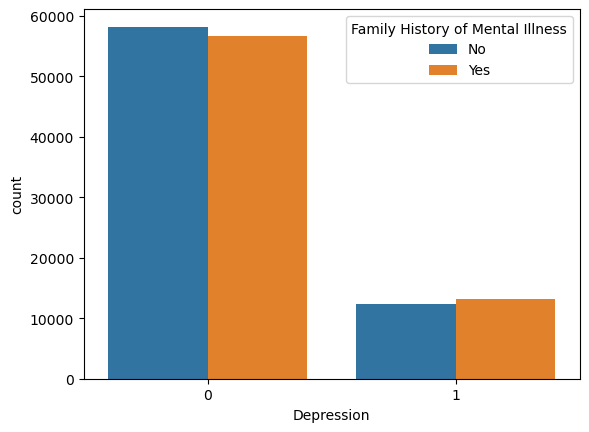

In [17]:
# depression depends on suicidal thoughts
sns.countplot(x='Depression',hue='Family History of Mental Illness', data=df)

<Axes: xlabel='Depression', ylabel='count'>

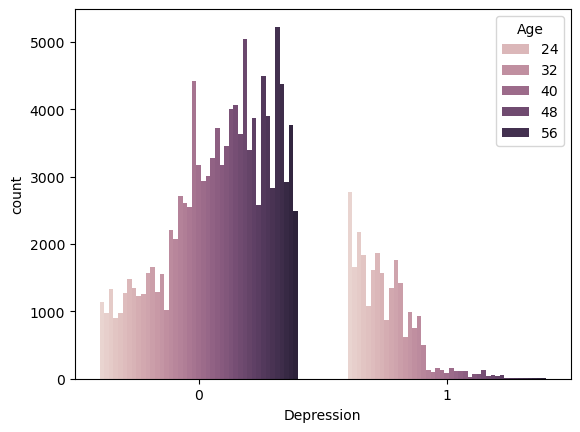

In [18]:
# signifies depression is a lot more common in younger people
sns.countplot(x='Depression',hue='Age',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140394 entries, 0 to 140699
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140394 non-null  object 
 1   Age                                    140394 non-null  float64
 2   Working Professional or Student        140394 non-null  object 
 3   Work Pressure                          140394 non-null  float64
 4   Job Satisfaction                       140394 non-null  float64
 5   Sleep Duration                         140394 non-null  object 
 6   Dietary Habits                         140394 non-null  object 
 7   Degree                                 140394 non-null  object 
 8   Have you ever had suicidal thoughts ?  140394 non-null  object 
 9   Work/Study Hours                       140394 non-null  float64
 10  Financial Stress                       140394 non-null  float

In [20]:
numerical_cols = []
categorical_cols = []
for c in df.columns:
    if df[c].dtypes == 'O':
        categorical_cols.append(c)
    else:
        numerical_cols.append(c)

In [21]:
numerical_cols

['Age',
 'Work Pressure',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [22]:
categorical_cols

['Gender',
 'Working Professional or Student',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [23]:
student_df = df[df['Working Professional or Student']=='Student']
professional_df = df[df['Working Professional or Student']=='Working Professional']

<Axes: xlabel='Depression', ylabel='count'>

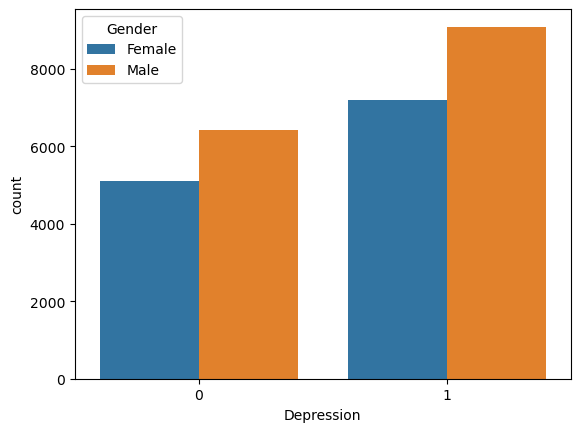

In [24]:
sns.countplot(x='Depression',hue=categorical_cols[0],data=student_df)

<Axes: xlabel='Depression', ylabel='count'>

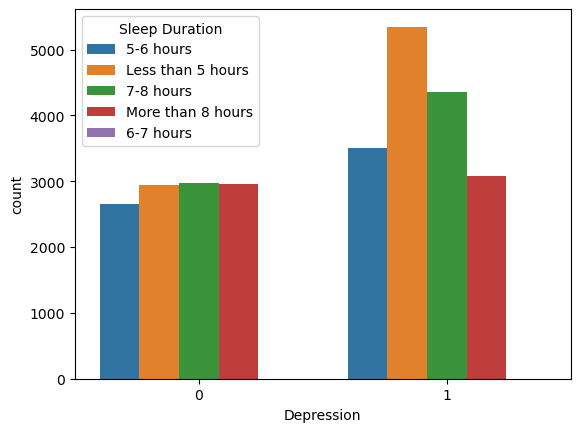

In [25]:
sns.countplot(x='Depression',hue=categorical_cols[2],data=student_df)

<Axes: xlabel='Depression', ylabel='count'>

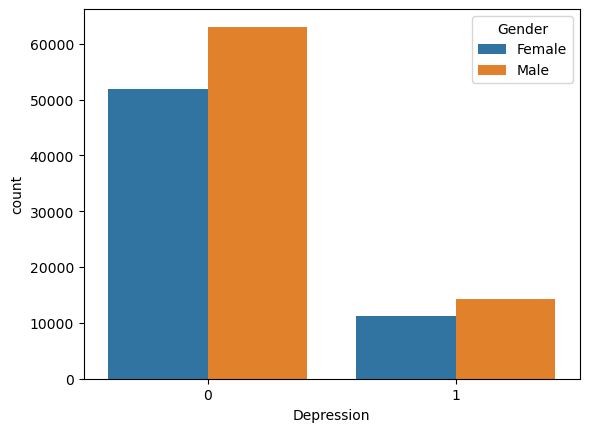

In [26]:
sns.countplot(x='Depression',hue=categorical_cols[0],data=df)

<Axes: xlabel='Depression', ylabel='count'>

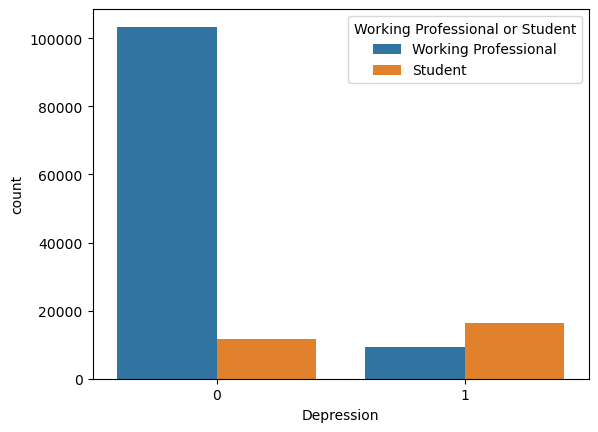

In [27]:
sns.countplot(x='Depression',hue=categorical_cols[1],data=df)

<Axes: xlabel='Depression', ylabel='count'>

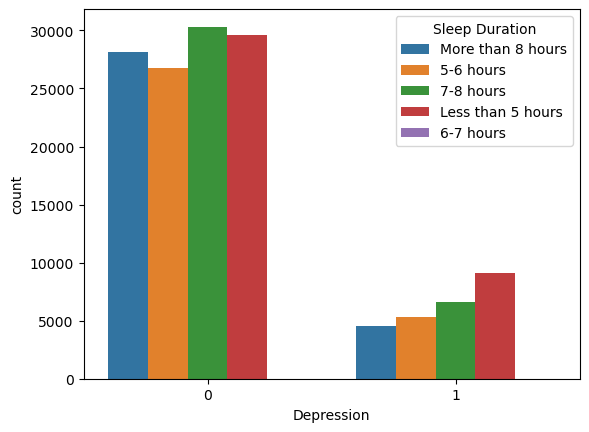

In [28]:
# those who sleeps more are less likely to have depression
sns.countplot(x='Depression',hue=categorical_cols[2],data=df)

<Axes: xlabel='Depression', ylabel='count'>

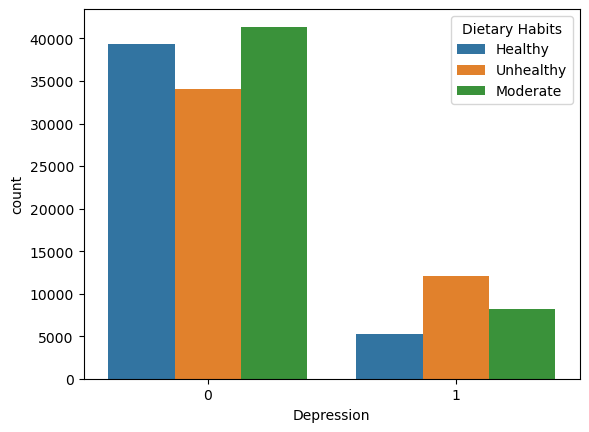

In [29]:
# Eat healthy foods to get less depression :)
sns.countplot(x='Depression',hue=categorical_cols[3],data=df)

<Axes: xlabel='Depression', ylabel='count'>

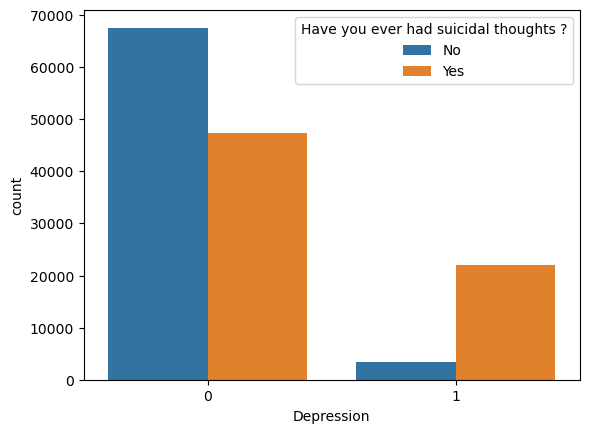

In [30]:
sns.countplot(x='Depression',hue=categorical_cols[5],data=df)

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for c in categorical_cols:
    df[c] = le.fit_transform(df[c])

In [32]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Depression'],axis=1)
y = df['Depression']
sc = StandardScaler()
sc.fit_transform(X,y)

array([[-1.10677212,  0.69527927,  0.49705117, ..., -1.36316891,
        -0.6995854 , -0.99447372],
       [ 0.90352836, -1.1620079 ,  0.49705117, ...,  0.19377624,
         0.00784047, -0.99447372],
       [ 0.90352836, -0.59674659, -2.01186529, ..., -0.84418719,
        -1.40701127, -0.99447372],
       ...,
       [-1.10677212, -1.32351113,  0.49705117, ..., -0.58469633,
         0.71526634, -0.99447372],
       [-1.10677212,  0.69527927,  0.49705117, ...,  0.97224881,
        -1.40701127, -0.99447372],
       [ 0.90352836, -1.08125628, -2.01186529, ..., -1.10367805,
         0.00784047,  1.00555699]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     34401
           1       0.70      0.71      0.70      7718

    accuracy                           0.89     42119
   macro avg       0.82      0.82      0.82     42119
weighted avg       0.89      0.89      0.89     42119



In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     34401
           1       0.82      0.79      0.80      7718

    accuracy                           0.93     42119
   macro avg       0.88      0.88      0.88     42119
weighted avg       0.93      0.93      0.93     42119



In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))